In [1]:
!pip install transformers matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Cell 1: Imports
import random
import matplotlib.pyplot as plt
from datetime import datetime
from transformers import pipeline

# Cell 2: Simulated Aptos Transaction Fetcher
class AptosMockAPI:
    def get_recent_transactions(self, count=5):
        # Simulate random Aptos activity
        activities = ["Token Transfer", "NFT Mint", "Smart Contract Call", "Staking", "Burn"]
        transactions = []
        for _ in range(count):
            tx = {
                "type": random.choice(activities),
                "amount": random.randint(1, 1000),
                "timestamp": datetime.utcnow().isoformat(),
                "to": f"0x{random.randint(1000,9999):x}",
                "from": f"0x{random.randint(1000,9999):x}"
            }
            transactions.append(tx)
        return transactions

# Cell 3: Dream Generator using LLM (Poetic Oracle)
class DreamOracle:
    def __init__(self):
        self.generator = pipeline("text-generation", model="gpt2")
    
    def interpret_transaction(self, tx):
        prompt = f"A mysterious {tx['type']} of {tx['amount']} units occurred between {tx['from']} and {tx['to']}.\n"
        prompt += "In the dream of the Aptos chain, this means:\n"
        dream = self.generator(prompt, max_length=60, num_return_sequences=1)[0]["generated_text"]
        return dream.strip()

# Cell 4: Visual Display
def display_dream(dream_text, tx):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('off')
    ax.text(0.5, 0.6, f"🌙 Dream from {tx['timestamp']}", fontsize=12, ha='center')
    ax.text(0.5, 0.4, dream_text, wrap=True, ha='center', fontsize=10)
    plt.show()

# Cell 5: Run the Oracle
api = AptosMockAPI()
oracle = DreamOracle()



transactions = api.get_recent_transactions(count=3)

for tx in transactions:
    dream = oracle.interpret_transaction(tx)
    display_dream(dream, tx)


C:\Users\raj45\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


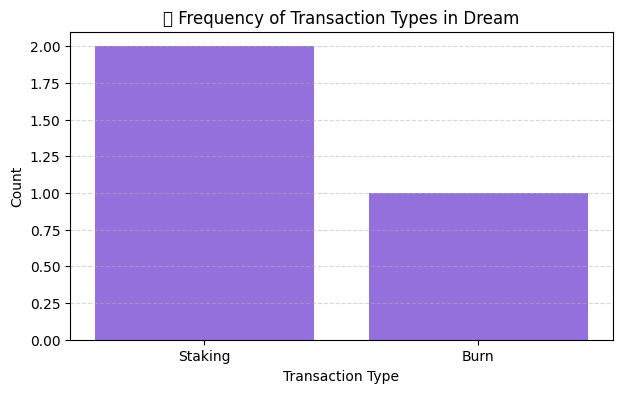

In [3]:
# Cell: Transaction Type Frequency
from collections import Counter

types = [tx["type"] for tx in transactions]
counter = Counter(types)

plt.figure(figsize=(7, 4))
plt.bar(counter.keys(), counter.values(), color='mediumpurple')
plt.title("🧾 Frequency of Transaction Types in Dream")
plt.ylabel("Count")
plt.xlabel("Transaction Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\raj45\AppData\Local\Temp\ipykernel_19404\1612848467.py:18: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\raj45\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


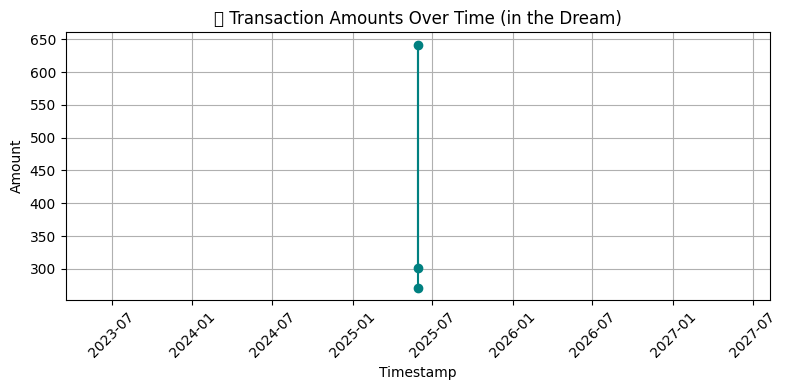

In [4]:
# Cell: Transaction Amounts Over Time
timestamps = [tx["timestamp"] for tx in transactions]
amounts = [tx["amount"] for tx in transactions]

# Convert to datetime for sorting
import pandas as pd
df = pd.DataFrame({"timestamp": timestamps, "amount": amounts})
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

plt.figure(figsize=(8, 4))
plt.plot(df["timestamp"], df["amount"], marker='o', color='teal')
plt.title("🔁 Transaction Amounts Over Time (in the Dream)")
plt.ylabel("Amount")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


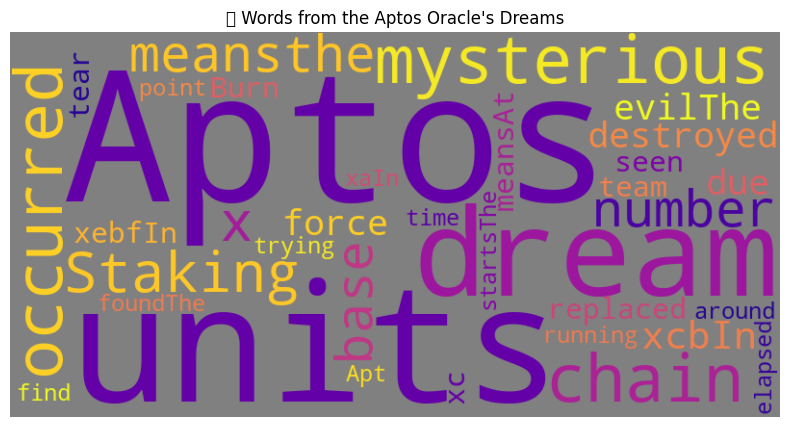

In [7]:
# Cell: Word Cloud
from wordcloud import WordCloud
import re

# Combine all dream texts
dream_texts = [oracle.interpret_transaction(tx) for tx in transactions]
all_text = " ".join(dream_texts)

# Clean text
clean_text = re.sub(r"[^a-zA-Z ]", "", all_text)

wordcloud = WordCloud(width=800, height=400, background_color='grey', colormap='plasma').generate(clean_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🌌 Words from the Aptos Oracle's Dreams")
plt.show()


C:\Users\raj45\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


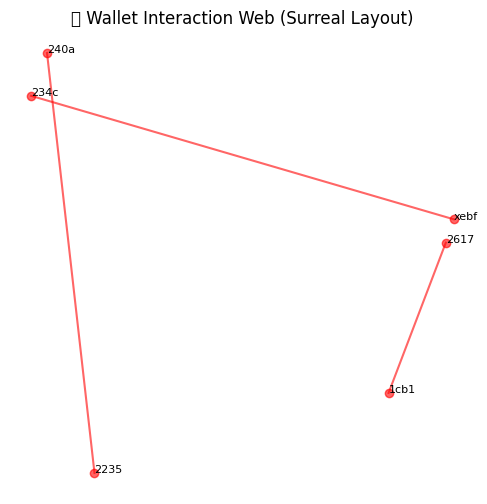

In [8]:
# Cell: Abstract Wallet Interaction Map
import numpy as np

wallets = list(set([tx["from"] for tx in transactions] + [tx["to"] for tx in transactions]))
coords = {w: (random.random(), random.random()) for w in wallets}

plt.figure(figsize=(6, 6))
for tx in transactions:
    x1, y1 = coords[tx["from"]]
    x2, y2 = coords[tx["to"]]
    plt.plot([x1, x2], [y1, y2], 'ro-', alpha=0.6)
    plt.text(x1, y1, tx["from"][-4:], fontsize=8)
    plt.text(x2, y2, tx["to"][-4:], fontsize=8)

plt.title("🔗 Wallet Interaction Web (Surreal Layout)")
plt.axis("off")
plt.show()
